<a href="https://colab.research.google.com/github/singhmanas1/showcase/blob/feat%2Fnx_cugraph_demo/nx_cugraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
[RAPIDS cuGraph](https://github.com/rapidsai/cugraph) is a monorepo that represents a collection of packages focused on GPU-accelerated graph analytics, including support for property graphs, remote (graph as a service) operations, and graph neural networks (GNNs). cuGraph supports the creation and manipulation of graphs followed by the execution of scalable fast graph algorithms.

[RAPIDS nx-cugraph](https://github.com/rapidsai/cugraph/tree/branch-24.10/python/nx-cugraph) is a backend to NetworkX to run supported algorithms with GPU acceleration with zero code change.

### System Requirements-<br>
nx-cugraph requires the following:

1. NVIDIA GPU, Volta architecture or later, with compute capability 7.0+<br>
2. CUDA 11.2, 11.4, 11.5, 11.8, or 12.0<br>
3. Python version 3.9, 3.10, or 3.11<br>
4. NetworkX >= version 3.0 (version 3.2 or higher recommended)

More details about system requirements can be found in the [RAPIDS System Requirements documentation](https://docs.rapids.ai/install#system-req).



# ⚠️ Verify your setup

First, we'll verify that you are running with an NVIDIA GPU.

In [ ]:
!nvidia-smi  # this should display information about available GPUs

Mon Aug 26 01:22:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

# Installation-

nx-cugraph can be installed via `pip` or `conda` package manger.

In [ ]:
# Installing the latest version of nx-cugraph via pip-
!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.8/783.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: rmm-cu12
    Found existing installation: rmm-cu12 24.4.0
    Uninstalling rmm-cu12-24.4.0:
      Successfully uninstalled rmm-cu12-24.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires rmm-cu12==24.4.*, but you have rmm-cu12 24.8.2 which is incompatible.


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Downloading data-

A dataset containing patent and their citations

In [ ]:
url = "https://data.rapids.ai/cugraph/datasets/cit-Patents.csv"
df = pd.read_csv(aurl, sep=" ", names=["src", "dst"], dtype="int32")
G = nx.from_pandas_edgelist(df, source="src", target="dst")

In [ ]:
df.head(10)

,src,dst
0,1760390,0
1,2439225,0
2,1913823,1
3,2625036,1
4,1924675,2
5,1768137,3
6,3039288,4
7,3284974,4
8,3074383,5
9,3090012,5


`dest` patent is cited in `src` patent documentation

In [ ]:
# Shape of dataframe-
print(f"size of dataframe is : {df.shape}")

size of dataframe is : (16518948, 2)


In [ ]:
# Size of dataframe-
print(f"size of dataframe is : {round(df.memory_usage(deep=True).sum()/(1024**2),2)} MB")

size of dataframe is : 126.03 MB


## Graph visualization-

In [ ]:
# Define the degree threshold
degree_threshold = 200

# Get nodes with a degree higher than the threshold
nodes_to_keep = [n for n, d in G.degree() if d > degree_threshold]

# Create a subgraph with these nodes
G_subset = G.subgraph(nodes_to_keep)

In [ ]:
list[G_subset.nodes()]

list[NodeView((3702784, 3573765, 3618821, 3696656, 3702812, 3180577, 3641385, 2052156, 3668029, 3381309, 2525260, 3747917, 3647566, 3629135, 1126476, 3676240, 3602516, 1562716, 3291236, 2676842, 1665131, 3723380, 3670140, 3731581, 3684482, 3684486, 3152010, 2367633, 3289241, 3735707, 3614879, 3299489, 3336358, 3584172, 3156140, 3543214, 3477680, 3528882, 3524787, 1749176, 3121338, 3674321, 1507540, 3590358, 3635418, 3512538, 3498218, 3565820, 3432704, 3574028, 3387665, 2439443, 3453207, 3615012, 3612975, 3529017, 3301699, 3664198, 3647817, 3338582, 3592536, 3715421, 2238824, 3582313, 1913198, 1849714, 3574133, 2447733, 3711351, 2898305, 3701132, 2296211, 3766687, 3660211, 3555769, 2400706, 3621314, 2550210, 3635672, 3609049, 2564572, 3709406, 3637734, 3391975, 3240428, 3693046, 3619320, 3170809, 3480063, 3574277, 3688968, 1985034, 2138653, 2169374, 3531320, 2900537, 3600953, 1165888, 3594819, 3766855, 3643978, 2480715, 3543626, 2161229, 3613278, 3580520, 3725958, 3543692, 1858192, 3433

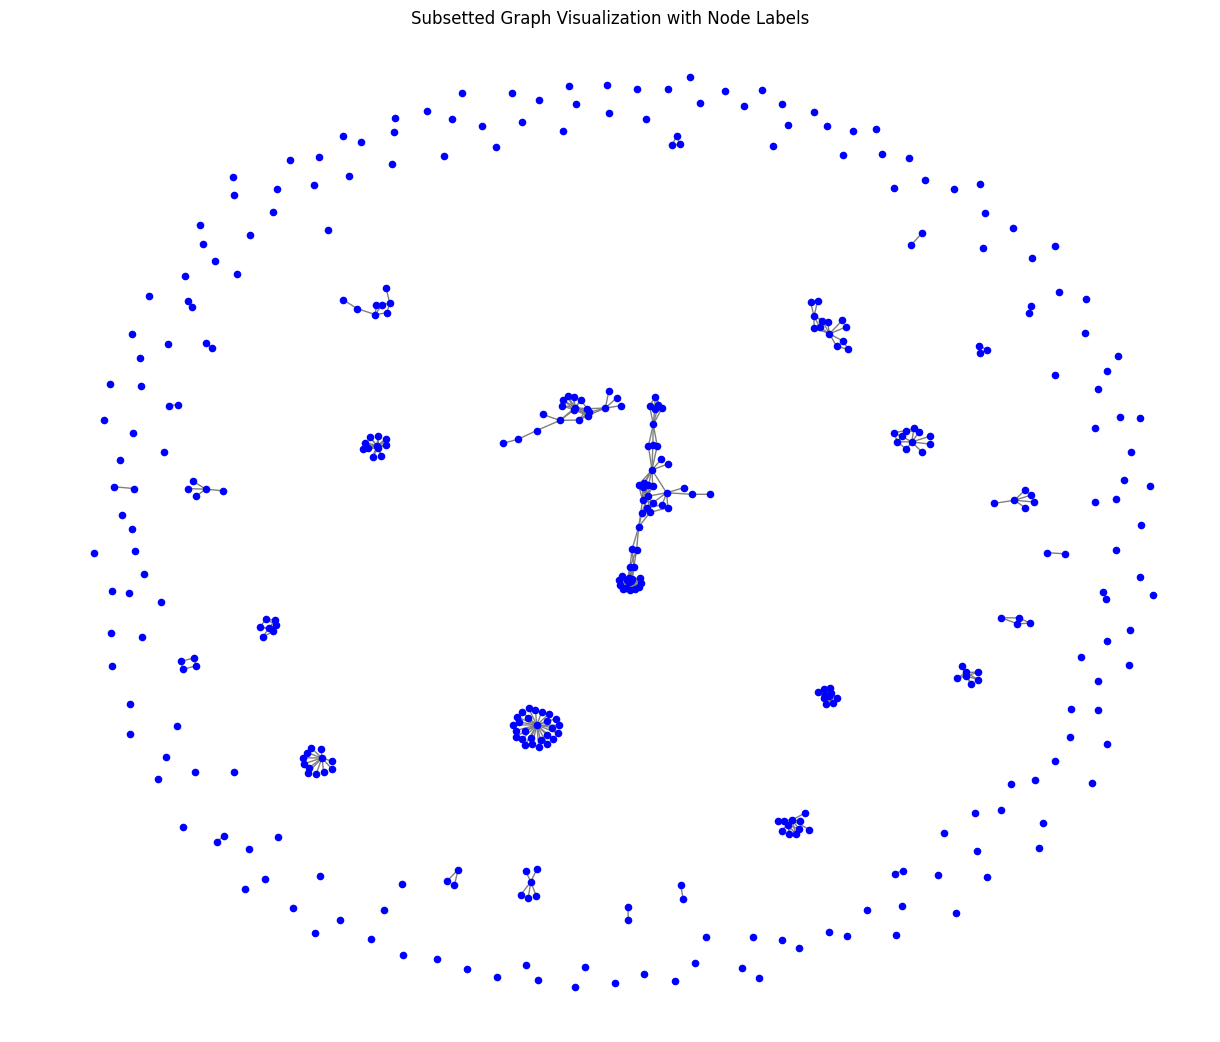

In [ ]:
plt.figure(figsize=(12, 10))

# Draw the graph with a layout, for example, spring layout
pos = nx.spring_layout(G_subset)

# Draw the nodes and edges
nx.draw(G_subset, pos, node_size=20, node_color='blue', edge_color='gray', with_labels=False)

plt.title("Subsetted Graph Visualization with Node Labels")
plt.show()

# Q. Which patents are the most influential in the citation network?



Betweenness centrality is a measure of how often a patent lies on the shortest paths between other patents. A patent with high betweenness centrality is likely to be a key intermediary in the citation network, meaning that it is cited by patents that themselves are well-connected or that cite many other patents.

## Analysis using NetworkX

In [ ]:
%time result = nx.betweenness_centrality(G, k=10)

CPU times: user 9min 12s, sys: 9.28 s, total: 9min 22s
Wall time: 9min 20s


In [ ]:
# Print the top 5 patents with the highest betweenness centrality
top_5_influential_patents = sorted(result.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 most influential patents based on betweenness centrality:")
for patent, centrality in top_5_influential_patents:
    print(f"Patent {patent} has betweenness centrality of {centrality}")

Top 5 most influential patents based on betweenness centrality:
Patent 2940926 has betweenness centrality of 0.09215674310326037
Patent 3112253 has betweenness centrality of 0.07672616671391955
Patent 3249163 has betweenness centrality of 0.06842053212211376
Patent 2609448 has betweenness centrality of 0.05009836280178156
Patent 1521936 has betweenness centrality of 0.04367501915789506


## Analysis using the `cugraph` to networkX



### **Option 1**: `NETWORKX_AUTOMATIC_BACKENDS=cugraph`

The **`NETWORKX_AUTOMATIC_BACKENDS`** environment variable can be used to have NetworkX automatically dispatch to specified backends. Set **`NETWORKX_AUTOMATIC_BACKENDS=cugraph`** to use nx-cugraph to GPU accelerate supported APIs with no code changes.

`bash> NETWORKX_AUTOMATIC_BACKENDS=cugraph python my_networkx_script.py`

### **Option 2** : `backend= keyword` argument<br>

To explicitly specify a particular backend for an API, use the `backend= keyword` argument.

Note: This argument takes precedence over the NETWORKX_AUTOMATIC_BACKENDS environment variable.

This requires anyone running code that uses the backend= keyword argument to have the specified backend installed.

In [ ]:
%time result = nx.betweenness_centrality(G, k=10, backend="cugraph")

CPU times: user 18.3 s, sys: 893 ms, total: 19.2 s
Wall time: 19 s


### **Option 3** - Type dispatching

NetworkX also supports automatically dispatching to backends associated with specific graph types. Like the backend= keyword argument example above, this requires the user to write code for a specific backend, and therefore requires the backend to be installed, but has the advantage of ensuring a particular behavior without the potential for runtime conversions.

To use type-based dispatching with nx-cugraph, the user must import the backend directly in their code to access the utilities provided to create a Graph instance specifically for the nx-cugraph backend.

In [ ]:
import nx_cugraph as nxcg

%time nxcg_G=nxcg.from_networkx(G)  # conversion happens once here
print(type(nxcg_G))
%time result=nx.betweenness_centrality(nxcg_G, k=10)  # nxcg Graph type causes cugraph backend

CPU times: user 16.7 s, sys: 414 ms, total: 17.1 s
Wall time: 17 s
<class 'nx_cugraph.classes.graph.Graph'>
CPU times: user 1.98 s, sys: 368 ms, total: 2.35 s
Wall time: 2.34 s


#### We see a total of 30x acceleration!

## Q. How tightly clustered are the patents in the network?

The average clustering coefficient is a measure of the degree to which patents in tend to cluster together. It reflects how likely it is that to patents that are directly connect to another patent are also connected themselves. In other words, it measures the “cliquishness” of the network.

The average clustering coefficient provides insight into the overall structure of the network:



**High Average Clustering Coefficient:**
* Indicates that the network has a tendency to form tightly-knit groups where nodes are highly interconnected.
*  In the context of a citation network, a high average clustering coefficient suggests that patents tend to cite each other within closely related technological areas or communities.

**Low Average Clustering Coefficient**
* Suggests that the network is more loosely connected, with fewer tightly-knit groups.
* In a citation network, this indicates that patents are citing across a wider range of technological areas, with less local clustering.


Mathematically -

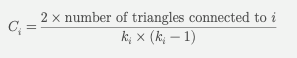

If  k_i  is 0 or 1,  C_i  is defined as 0 since no triangles can form.

In [ ]:
%%time
# Calculate the average clustering coefficient
average_clustering = nx.average_clustering(G)
print(f"The average clustering coefficient of the network is {average_clustering:.4f}")

The average clustering coefficient of the network is 0.0757
CPU times: user 3min 4s, sys: 532 ms, total: 3min 4s
Wall time: 3min 4s


In [ ]:
%%time
# Calculate the average clustering coefficient
average_clustering = nx.average_clustering(G,backend="cugraph")
print(f"The average clustering coefficient of the network is {average_clustering:.4f}")

The average clustering coefficient of the network is 0.0757
CPU times: user 16.2 s, sys: 532 ms, total: 16.7 s
Wall time: 16.5 s


#### That's a **12x acceleration** with no change in the code

#Q. What are the most important patents according to their global influence?

PageRank is used to determine the “importance” or “influence” of each patent based on how often it is cited and the importance of the patents that cite it. A patent that is cited by many other influential patents is likely to be considered more important globally. A few characteristics of PageRank worth noting-

> **Global Influence:** PageRank takes into account the quality of the citing patents and not just the count of patent. A patent cited by influential patents is ranked higher, even if it doesn’t have the most direct citations.



> **Capturing Indirect Influence:** PageRank considers not just direct citations but also indirect connections. For instance, if patent A cites patent B, and patent B cites patent C, then A also contributes to the influence of C, albeit indirectly.





## Analysis using NetworkX

In [ ]:
%%time
pagerank = nx.pagerank(G)

# Print the top 5 patents with the highest PageRank-
top_5_pagerank_patents = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 most important patents based on PageRank:")
for patent, rank in top_5_pagerank_patents:
    print(f"Patent {patent} has a PageRank Score of {rank:.8f}")

Top 5 most important patents based on PageRank:
Patent 2475029 has a PageRank Score of 0.00002703
Patent 2475036 has a PageRank Score of 0.00002202
Patent 3445863 has a PageRank Score of 0.00001781
Patent 3391975 has a PageRank Score of 0.00001764
Patent 3106961 has a PageRank Score of 0.00001460
CPU times: user 1min 42s, sys: 3.9 s, total: 1min 46s
Wall time: 1min 45s


PageRank scores indicate the probability that a random walker (or “surfer”) on the graph would arrive at this particular node (patent) if they were following the edges (citations) of the graph.

In [ ]:
top_5_pagerank_patents

[(2475029, 2.7030499437746426e-05),
 (2475036, 2.2020953754718194e-05),
 (3445863, 1.781009001371752e-05),
 (3391975, 1.764495845243128e-05),
 (3106961, 1.4602673584629566e-05)]

## Analysis using cugraph backend

In [ ]:
%%time
# Calculate PageRank
pagerank = nx.pagerank(G, backend = "cugraph")

# Print the top 5 patents with the highest PageRank-
top_5_pagerank_patents = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 most important patents based on PageRank:")
for patent, rank in top_5_pagerank_patents:
    print(f"Patent {patent} has a PageRank Score of {rank:.8f}")

Top 5 most important patents based on PageRank:
Patent 2475029 has a PageRank Score of 0.00002703
Patent 2475036 has a PageRank Score of 0.00002202
Patent 3445863 has a PageRank Score of 0.00001781
Patent 3391975 has a PageRank Score of 0.00001764
Patent 3106961 has a PageRank Score of 0.00001460
CPU times: user 30.4 s, sys: 915 ms, total: 31.3 s
Wall time: 31 s


**4x speedup!**

#Q. Which patents are central to connecting different technological fields

In posing the above question, we are assuming that each cluster of patents correspond to a technological field.

One effective method to identify such independent cluster of patents is identifying louvain communities using Louvain Algorithm.

The Louvain algorithm is a method for detecting communities within large networks. It works by maximizing the modularity of the network, which is a measure of the strength of division of a network into communities.

### Analysis using NetworkX

#### Execution couldn't complete even after 40 minutes!

In [ ]:
%%time
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Detect communities using Louvain algorithm
communities = nx.community.louvain_communities(G, seed=123)

KeyboardInterrupt: 

### Analysis using `cugraph` backend

In [ ]:
%%time
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Detect communities using Louvain algorithm
communities = nx.community.louvain_communities(G, seed=123, backend="cugraph")

CPU times: user 29.9 s, sys: 2.84 s, total: 32.7 s
Wall time: 39 s


## Visualizing 3 louvain communities

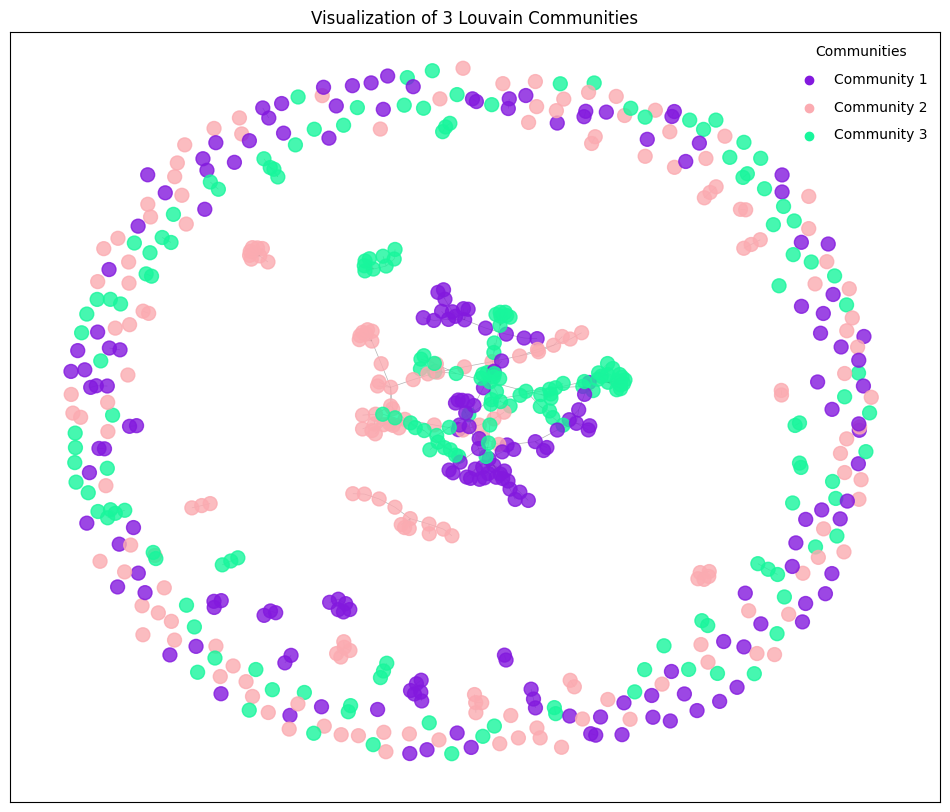

In [ ]:
# Sort communities by size and select the top 2 largest communities
top_communities = sorted(communities, key=len, reverse=True)[80:83]

# Step 2: Create a mapping of node to its community
node_to_community = {}
nodes_per_community = 200

for i, community in enumerate(top_communities):
    for j, node in enumerate(community):
        node_to_community[node] = i
        if j >= nodes_per_community:
          break

# Step 3: Create a subgraph containing only the nodes in these 2 communities
nodes_to_keep = set(node_to_community.keys())
G_sub = G.subgraph(nodes_to_keep)

# Step 4: Assign a color to each of the 2 communities
community_colors = {i: "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(3)}

# Step 5: Draw the subgraph using Kamada-Kawai layout
plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G_sub)  # Kamada-Kawai layout for positioning the nodes

# Draw nodes with color according to community
nx.draw_networkx_nodes(G_sub, pos, node_color=[community_colors[node_to_community[node]] for node in G_sub.nodes()], node_size=100, alpha=0.8)

# Draw edges with reduced alpha and width
nx.draw_networkx_edges(G_sub, pos, alpha=0.3, width=0.5)

# Add a legend for clarity
for community_id, color in community_colors.items():
    plt.scatter([], [], c=color, label=f'Community {community_id+1}')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title="Communities")

plt.title("Visualization of 3 Louvain Communities")
plt.show()